In [4]:
import numpy as py
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
wells = []
#os.chdir(r"C:\Users\Vaishnav Bipin\Downloads\Data")
##global scope variable for the path to where all the well data is stored
_PATH = "Data/"

In [5]:
class Well:
    ##This is a well class that will hold all the properties of a well
    ##and also will be able to do relevant calculations for a given well
    
    ##Once the data is set in the constructor, please do not change the values when they are accessed.
    ##Apparently I can't prevent this in Python, but I can at least advise against it.
    
    def __init__(self, easting, northing, porosity, permeability, PR, YM, wSaturation, oSaturation, thickness, proppant,
                 pumpRate, name, RF, Pa, FVF, oilByMonth, waterByMonth):
        self.easting = easting ##easting
        self.northing = northing ##northing
        self.porosity = porosity ##porosity
        self.permeability = permeability ##permeability
        self.PR = PR ##poissons's ratio
        self.YM = YM ##young's modulus
        self.wSaturation = wSaturation ##water saturation
        self.oSaturation = oSaturation ##oil saturation
        self.thickness = thickness ##thickness
        self.proppant = proppant ##proppant weight
        self.pumpRate = pumpRate ##pumpRate
        self.name = name ##name
        self.RF = RF ##recovery factor
        self.Pa = Pa ##average pressure
        self.FVF = FVF ##formation volume factor
        self.oilByMonth = oilByMonth ##oil produced in each month
        self.waterByMonth = waterByMonth ##water produced in each month
    
    ##returns the length of the well
    def getWellLength(self):
        return self.easting.max()-self.easting.min()
    
    #returns the total oil produced by the well
    def getTotalProduction(self):
        return self.oilByMonth.sum()
    
    ##returns the oil in place for this given well
    def getOilInPlace(self):
        return ((7758 * 360 * self.thickness * self.porosity * (1 - self.wSaturation)) / self.FVF)
    
    ##returns the recoverable reserves of this well
    def getRecoverableReserves():
        return (getOriginalOilPlace() * RF)
    
    ##returns rate of initial production for this well
    def getROIP():
        pass 
    
    ##returns the life of this reservoir
    def getLR():
        pass
    
    ##returns the cumulative production of this well
    def getCP():
        pass
    
    
    
    def getFracStages(self):
        count = 0
        for rate in self.pumpRate:
            if (pd.notnull(rate)):
                count+=1
        return count
    
    def getAvgPumpRate(self):
        return self.pumpRate.mean(skipna = True)
    
    def getAvgProppant(self):
        return self.proppant.mean(skipna = True)
    
    
    ##this is the kind of functioning as a toString right now, almost no reason for it
    def getName(self):
        return self.name
    
    ##method to return oil produced in a given month
    def getOilAtMonth(self, n):
        if n > 12 or n < 1:
            ##bad
            return -1
        else:
            return self.oilByMonth[n]
    
    ##method to return water produced in a given month
    def getOilAtMonth(self, n):
        if n > 12 or n < 1:
            ##bad
            return -1
        else:
            return self.waterByMonth[n]
    
    ##method to display data for this well
    ##depth will be for getiing data at a given depth in a well. Not sure if or when I should implement this
    def displayData(self, depth = 0):
        if depth == 0:
            data = pd.read_csv(_PATH + self.name + ".csv")
        else:
            data = pd.read_csv(_PATH + self.name + ".csv")
            
        print("Displaying data for: " + self.name)
        print(data)

In [8]:
##method to take the data given, create a well object and store it in wells
def createWells():
    wellProduction = pd.read_csv(_PATH + "well production.csv")
    for i in range(100):
    ##for every well
        ##get all the data from the well production csv
        name = wellProduction.at[i, "well name"]
        ap = wellProduction.at[i, "average pressure (Pa)"]
        RF = wellProduction.at[i, "recovery factor"]
        FVF = wellProduction.at[i, "formation volume factor"]
        oil = wellProduction.iloc[i, 4:16] ##oil per month
        water = wellProduction.iloc[i, 16:28] ##water per month
        ##now that we have the name of the well, we can use that to access its
        ##own csv file and get that data
        wellDF = pd.read_csv(_PATH + name + ".csv")
        e = wellDF["easting"]
        n = wellDF["northing"]
        p = wellDF["porosity"]
        perm = wellDF["permeability"]
        pr = wellDF["Poisson's ratio"]
        ym = wellDF["Young's Modulus"]
        ws = wellDF["water saturation"]
        os = wellDF["oil saturation"]
        thick = wellDF["thickness (ft)"]
        prop = wellDF["proppant weight (lbs)"]
        pump = wellDF["pump rate (cubic feet/min)"]
        ##create a new well
        temp = Well(e, n, p, perm, pr, ym, ws, os, thick, prop, pump, name, RF, ap, FVF, oil, water)
        ##append the new well to the list
        wells.append(temp)
        

In [9]:
createWells()

Text(0, 0.5, 'Total Production')

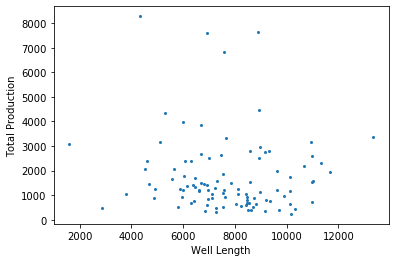

In [10]:
#Graph well length vs total production
xCoords = []
yCoords = []
depthVals = []
for well in wells:
    xCoords.append(well.getWellLength())
    yCoords.append(well.getTotalProduction())
    depthVals.append(well.thickness)
plt.scatter(xCoords, yCoords, s = 4)
plt.xlabel("Well Length")
plt.ylabel("Total Production")

In [11]:
#Graph amount of proppant to production

Text(0, 0.5, 'Total Production')

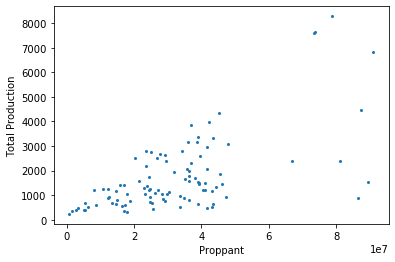

In [12]:
xCoords = []
yCoords = []
for well in wells:
    xCoords.append(well.proppant.sum())
    yCoords.append(well.getTotalProduction())
plt.scatter(xCoords, yCoords, s = 4)
plt.xlabel("Proppant")
plt.ylabel("Total Production")

Text(0, 0.5, 'Total Production')

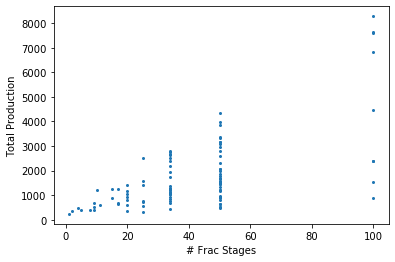

In [14]:
xCoords = []
yCoords = []
for well in wells:
    xCoords.append(well.getFracStages())
    yCoords.append(well.getTotalProduction())
plt.scatter(xCoords, yCoords, s = 4)
plt.xlabel("# Frac Stages")
plt.ylabel("Total Production")

In [ ]:
#linear regression on above graph
#linreg = LinearRegression()
#X = [xCoords]
#linreg.fit(X,yCoords)
#plt.plot(X, yCoords)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

model = tf.keras.Sequential()
# number of internal layers and nodes per layer chosen completely arbitrarily
model.add( tf.keras.layers.Dense( units=20, input_shape=(4,) ) )
model.add( tf.keras.layers.Activation(activation='relu') )
model.add( tf.keras.layers.Dense( units=20, input_shape=(20,) ) )
model.add( tf.keras.layers.Activation(activation='relu') )
model.add( tf.keras.layers.Dense( units=1, input_shape=(20,) ) )


#sgd = tf.keras.optimizers.SGD( lr=0.01 )
#sgd = tf.compat.v1.train.AdamOptimizer(learning_rate = 0.0001)

loss = 'mean_squared_error'
# had to switch out of sgd optimizer since it would obtain NaN for losses
model.compile(optimizer='adam', loss = loss)

x1 = []
x2 = []
x3 = []
x4 = []
y1 = []
i = 0;
for well in wells:
    if (i%4!=3):
        x1.append(well.getWellLength())
        x2.append(well.getFracStages())
        x3.append(well.getAvgProppant())
        x4.append(well.getAvgPumpRate())
        y1.append(well.getTotalProduction())
    i+=1
y = py.array(y1)

input_features1 = py.stack([x1,x2,x3,x4]).T
input_features = py.array(input_features1)
print(input_features)
print("\n")
print(y)
model.fit(input_features, y, epochs=2000)
y_predict = model.predict(input_features).reshape(-1)

print(f"The relative error of the model is  \
      {py.mean(abs((y-y_predict)/y))*100:2.2f}%")

x1_test = []
x2_test = []
x3_test = []
x4_test = []
y_real1 = []
i = 0;
for well in wells:
    if (i%4==3):
        x1_test.append(well.getWellLength())
        x2_test.append(well.getFracStages())
        x3_test.append(well.getAvgProppant())
        x4_test.append(well.getAvgPumpRate())
        y_real1.append(well.getTotalProduction())
    i+=1
y_real = py.array(y_real1)

print(df3)

input_test1 = py.stack([x1_test,x2_test,x3_test,x4_test]).T
input_test = py.array(input_test1)

y_test = model.predict(input_test).reshape(-1)

# predictions vs. real displayed in a table at the bottom
df3 = pd.DataFrame()
df3['x1'] = x1_test
df3['x2'] = x2_test
df3['x3'] = x3_test
df3['x4'] = x4_test
df3['y_real'] = y_real
df3['y_pred'] = y_test
print(df3)